<a href="https://colab.research.google.com/github/LakshmiManaswini-7/profit-loss/blob/main/Data_Visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the libraries


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

import data

In [13]:
df = pd.read_csv(r'/SampleSuperstore.csv')   
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [14]:
df.shape

(9994, 13)

To check whether there are missing vaues

In [15]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Checking for corealation

Text(0.5, 1.0, 'corelation')

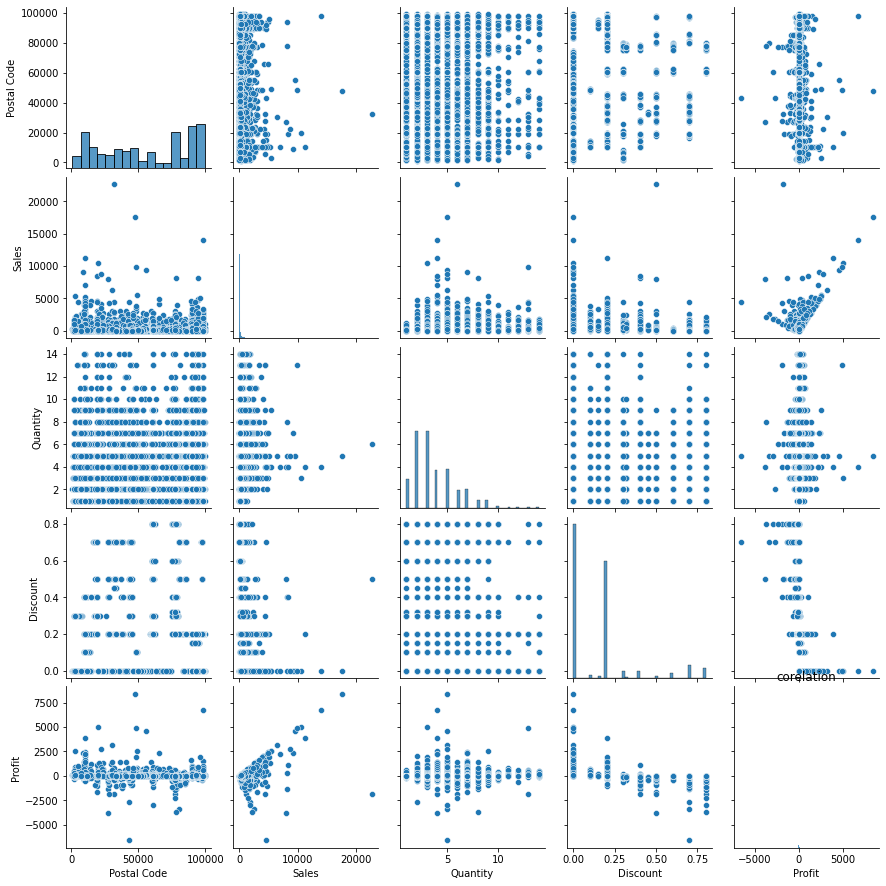

In [19]:
sns.pairplot(df)
plt.title('corelation')
plt.savefig(r'/SampleSuperstore/pair_plot')

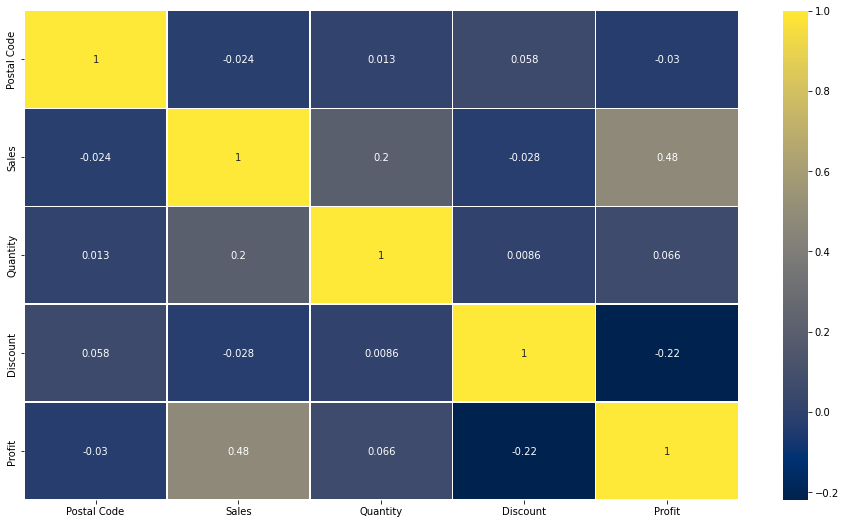

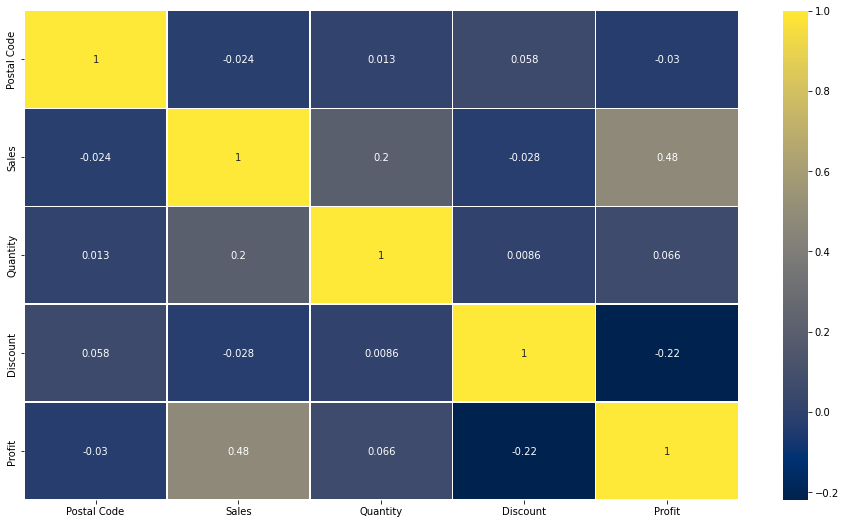

In [22]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), cmap='cividis', linewidth=0.30, annot=True)
plt.savefig(r'/SampleSuperstore\heatmap')
plt.show(0)

Taking cities

In [23]:
cities=df['City'].unique()
cities

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [24]:
len(cities)

531

In [26]:
cities_by_counts=df.City.value_counts()

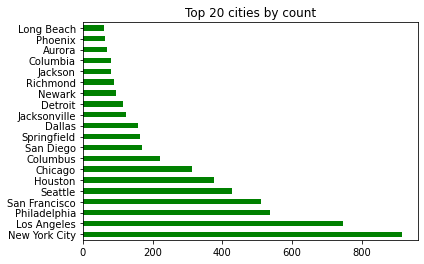

In [34]:
cities_by_counts[:20].plot(kind='barh',color='g')
plt.title('Top 20 cities by count')
plt.savefig(r'/SampleSuperstore\cities_bar_graph')
plt.show()

In [31]:
negtive_cities=[]
positive_cities=[]
profit_of_cities=[]
loss_of_cities=[]
for city in df['City'].unique():
      if df['Profit'][df['City']==city].mean()<=0:
        negtive_cities.append(city)
        loss_of_cities.append(df['Profit'][df['City']==city].mean())
      else:
        positive_cities.append(city)
        profit_of_cities.append(df['Profit'][df['City']==city].mean())

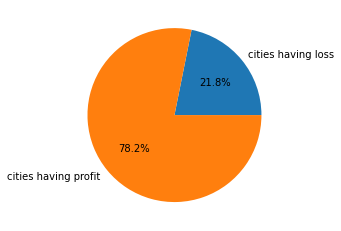

In [39]:
plt.pie([len(negtive_cities),len(positive_cities)], labels=['cities having loss' , 'cities having profit'], autopct='%1.1f%%')
plt.savefig(r'/SampleSuperstore\piechart_cities')
plt.show()

In [40]:
len(negtive_cities)

116

In [41]:
len(positive_cities)

415

In [43]:
df2=pd.DataFrame(list(zip(positive_cities,profit_of_cities)), columns=['city_name', 'av_profit']).sort_values(by='av_profit', ascending=False)[:20]

In [46]:
df3=pd.DataFrame(list(zip(negtive_cities,loss_of_cities)),columns=['city_name', 'av_loss']).sort_values(by='av_loss', ascending=False)[:20]

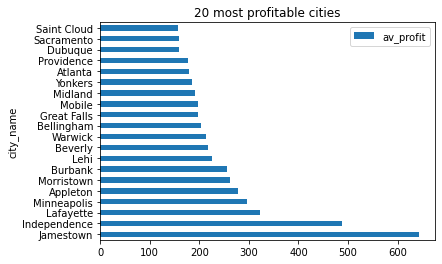

In [47]:
df2.plot(kind='barh', x="city_name",y="av_profit")
plt.title('20 most profitable cities')
plt.savefig(r'/SampleSuperstore\positive_cities')
plt.show()

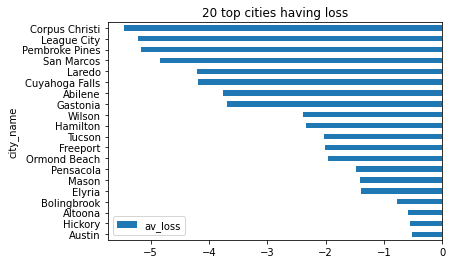

In [49]:

df3.plot(kind='barh',x="city_name",y="av_loss")
plt.title('20 top cities having loss')
plt.savefig(r'/SampleSuperstore\negative_cities')
plt.show()